# Setup

## Import modules

In [1]:
import numpy as np
import pandas as pd

# Data handling
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Tuning
from sklearn.model_selection import learning_curve, validation_curve

# Visualization
import matplotlib.pyplot as plt

SEED = 43

## Load data

In [2]:
dataS = datasets.load_breast_cancer(as_frame=True)
dataDF = dataS.data
targetDF = dataS.target
print(dataDF.shape)
dataDF.head()

(569, 30)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [3]:
X = dataDF.values
y = targetDF.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Learning curve - Logistic regression

## Set up pipeline

In [4]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(penalty='l2', random_state=SEED, solver='lbfgs', max_iter=10000))
])

rel_train_szs = np.linspace(0.1, 1.0, 10)

## Compute learning curve and validation curve

In [5]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lr_pipeline,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=rel_train_szs,
                                                        cv=10,
                                                        n_jobs=-1) #NOTE Setting seting n_jobs=-1 uses all available cores

In [6]:
train_scores.shape

(10, 10)

Note that the `train_scores` and `test_scores` variables contains a set of results from a 10-fold CV run for each training size.

In [7]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

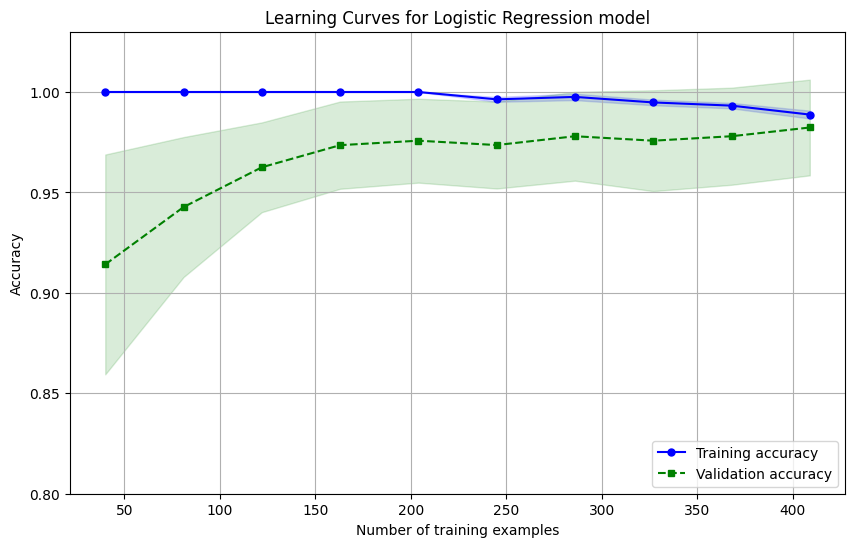

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Validation accuracy')

ax.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

ax.grid('on')
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curves for Logistic Regression model')
ax.legend(loc='lower right')
ax.set_ylim([0.8, 1.03])
plt.show()

# Learning curve - Support vector machine

Recall that the `C` parameter specifies the level of regularization. Regularization is **inversely proportional** to `C`.

/home/yohannjs/.pyenv/versions/3.10.8/envs/dat300_h23_new/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/yohannjs/.pyenv/versions/3.10.8/envs/dat300_h23_new/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


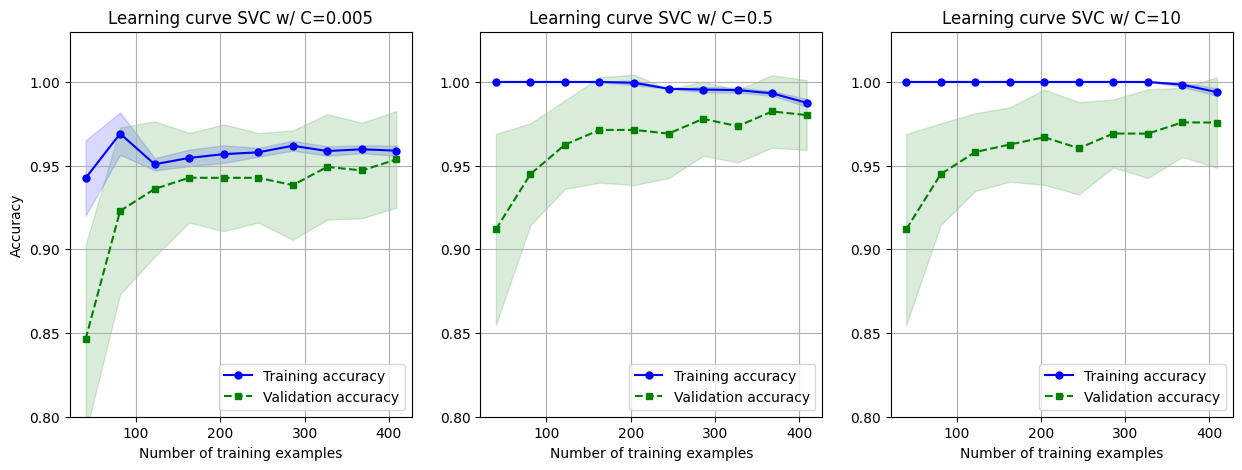

In [9]:
regularization_values = [0.005, 0.5, 10]

learn_curve_kwargs = {
    'X'          : X_train,
    'y'          : y_train,
    'train_sizes': rel_train_szs,
    'cv'         : 10,
    'n_jobs'     : -1
}

fig, ax = plt.subplots(1,3,figsize=(15, 5))

for i, reg_value in enumerate(regularization_values):
    SVC_pipeline = Pipeline([('scaler', StandardScaler()),
                             ('svc', SVC(kernel='linear', C=reg_value, random_state=SEED, max_iter=10000))
    ])
    train_sizes, train_scores, test_scores = learning_curve(SVC_pipeline, **learn_curve_kwargs)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    ax[i].plot(train_sizes, train_mean,
            color='blue', marker='o',
            markersize=5, label='Training accuracy')

    ax[i].fill_between(train_sizes,
                    train_mean + train_std,
                    train_mean - train_std,
                    alpha=0.15, color='blue')

    ax[i].plot(train_sizes, test_mean,
            color='green', linestyle='--',
            marker='s', markersize=5,
            label='Validation accuracy')

    ax[i].fill_between(train_sizes,
                    test_mean + test_std,
                    test_mean - test_std,
                    alpha=0.15, color='green')

    ax[i].grid('on')
    ax[i].set_xlabel('Number of training examples')
    ax[i].set_title(f'Learning curve SVC w/ C={reg_value}')
    ax[i].legend(loc='lower right')
    ax[i].set_ylim([0.8, 1.03])

ax[0].set_ylabel('Accuracy')
plt.show()

# Validation curves - Support vector machine

In [22]:
SVC_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', random_state=SEED, max_iter=100000))
])

C_param_range = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5, 10.0, 50, 100.0]

In [27]:
SVC_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('svc', SVC(kernel='linear', max_iter=100000, random_state=43))],
 'verbose': False,
 'scaler': StandardScaler(),
 'svc': SVC(kernel='linear', max_iter=100000, random_state=43),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'linear',
 'svc__max_iter': 100000,
 'svc__probability': False,
 'svc__random_state': 43,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [23]:
train_scores, test_scores = validation_curve(estimator=SVC_pipeline,
                                             X=X_train,
                                             y=y_train,
                                             param_name='svc__C',
                                             param_range=C_param_range,
                                             cv=10,
                                             n_jobs=-1)

In [24]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

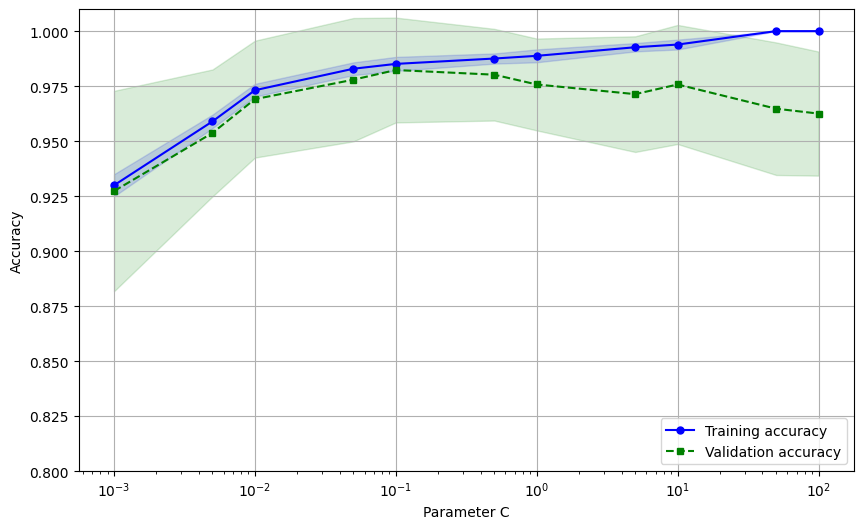

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(C_param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
ax.fill_between(C_param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
ax.plot(C_param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
ax.fill_between(C_param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

ax.grid('on')
ax.legend(loc='lower right')

ax.set_xscale('log')
ax.set_xlabel('Parameter C')
ax.set_ylabel('Accuracy')
ax.set_ylim([0.8, 1.01])
ax.set_title('Validation curve for SVC while varying regulization')
plt.show()

Given the plot above for the validation curve of an SVC model where we vary the `C` parameter, at what value of `C` does **overfitting** begin to occur? 